In [77]:
import numpy as np
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt

In [231]:
N = 1e4
m = 5 + 1
ba_network = nx.barabasi_albert_graph(N, m, seed=42543)


# 1a) Random attack:

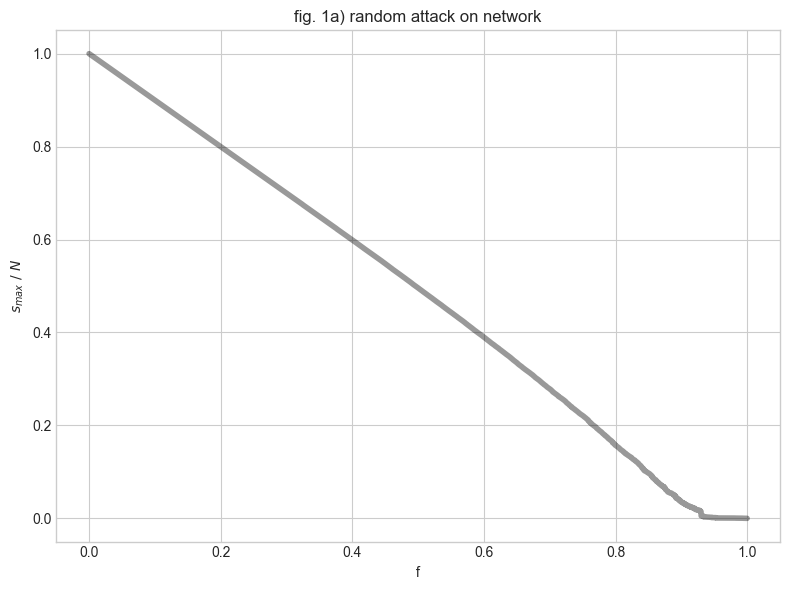

In [233]:
G = ba_network.copy()
attack_size = int(N) - 1
s_max_list_1 = []
f_list = [(i + 1) / N for i in range(attack_size)]
for i in range(int(attack_size)):

    node_to_remove = np.random.choice(list(G.nodes()))
    G.remove_node(node_to_remove)
    C = nx.connected_components(G)
    largest_C = max(C, key=len)
    s_max_list_1.append(len(largest_C))

plt.figure(figsize = (8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
normalized_s_max_list_1 = np.array(s_max_list_1) / N
plt.plot(f_list, normalized_s_max_list_1, color = 'k', lw = 4, alpha = 0.4)
plt.title("fig. 1a) random attack on network")
plt.ylabel("$ s_{max} ~/~ N $")
plt.xlabel(f"f")
plt.minorticks_on()
plt.tight_layout()
plt.show()


# 1b) Degree-targeted attack:

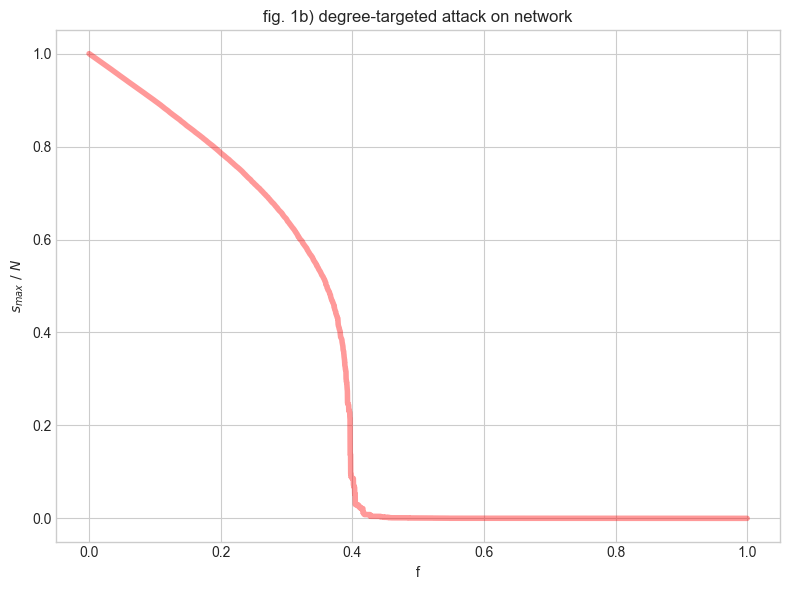

In [234]:
G = ba_network.copy()

attack_size = int(N) - 1
s_max_list_2 = []
f_list = [(i + 1) / N for i in range(attack_size)]
for i in range(int(attack_size)):
    node_to_remove, _ = max(G.degree, key=lambda x: x[1])
    G.remove_node(node_to_remove)
    largest_C = max(nx.connected_components(G), key=len)
    s_max_list_2.append(len(largest_C))

plt.figure(figsize = (8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
normalized_s_max_list_2 = np.array(s_max_list_2) / N
plt.plot(f_list, normalized_s_max_list_2, color = 'r', lw = 4, alpha = 0.4)
plt.title("fig. 1b) degree-targeted attack on network")
plt.ylabel("$ s_{max} ~/~ N $")
plt.xlabel(f"f")
plt.minorticks_on()
plt.tight_layout()
plt.show()

# 1c) Clustering-targeted attack:

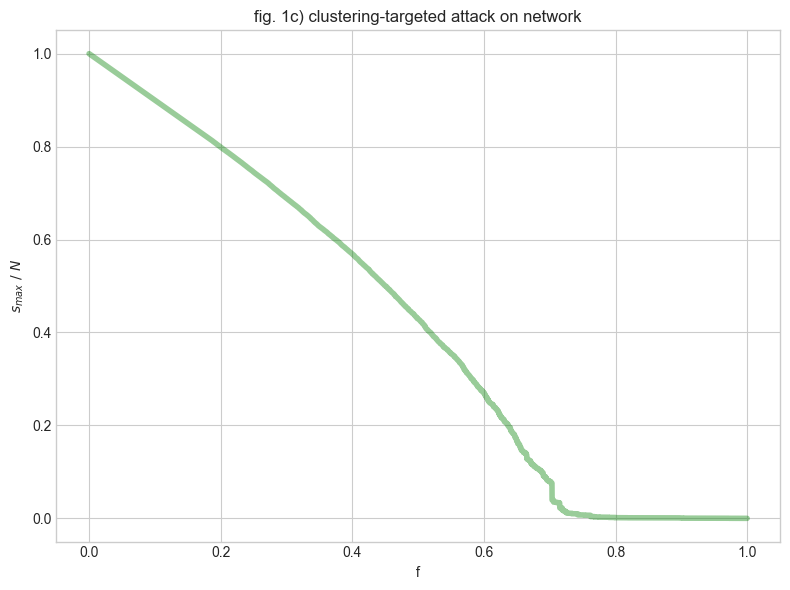

In [255]:
G = ba_network.copy()

attack_size = int(N) - 1
# attack_size = 100

s_max_list_3 = []
f_list = [(i + 1) / N for i in range(attack_size)]
for i in range(attack_size):
    clustering_coefficients = nx.clustering(G)
    node_to_remove = max(clustering_coefficients, key=clustering_coefficients.get)

    G.remove_node(node_to_remove)
    largest_C = max(nx.connected_components(G), key=len)
    s_max_list_3.append(len(largest_C))

plt.figure(figsize = (8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
normalized_s_max_list_3 = np.array(s_max_list_3) / N
plt.plot(f_list, normalized_s_max_list_3, color = 'g', lw = 4, alpha = 0.4)
plt.title("fig. 1c) clustering-targeted attack on network")
plt.ylabel("$ s_{max} ~/~ N $")
plt.xlabel(f"f")
plt.minorticks_on()
plt.tight_layout()
plt.show()

# 1d) Early-first attack:

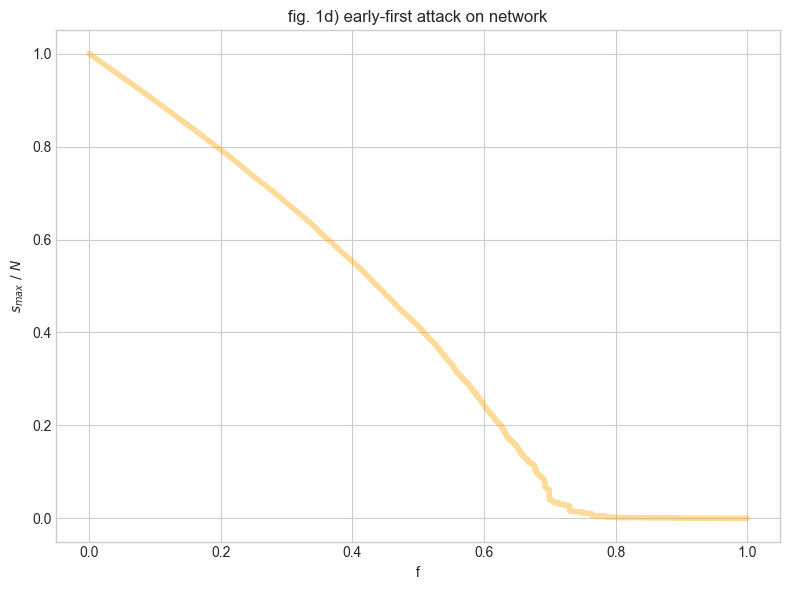

In [237]:
G = ba_network.copy()
attack_size = int(N) - 1
attack_size = min(attack_size, G.number_of_nodes())
s_max_list_4 = []
f_list = [(i + 1) / N for i in range(int(attack_size))]
node_to_remove_list = sorted(G.nodes())[:attack_size]
for count, node in enumerate(node_to_remove_list, start=1):
    G.remove_node(node)
    largest_C = max(nx.connected_components(G), key=len)
    s_max_list_4.append(len(largest_C))

plt.figure(figsize = (8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
normalized_s_max_list_4 = np.array(s_max_list_4) / N
plt.plot(f_list, normalized_s_max_list_4, color = 'orange', lw = 4, alpha = 0.4)
plt.title("fig. 1d) early-first attack on network")
plt.ylabel("$ s_{max} ~/~ N $")
plt.xlabel(f"f")
plt.minorticks_on()
plt.tight_layout()
plt.show()

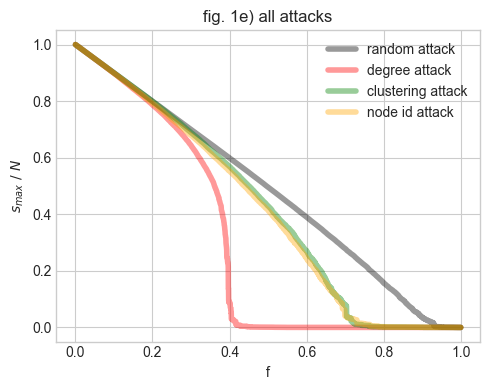

In [267]:
plt.figure(figsize = (5, 4))
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(f_list, normalized_s_max_list_1, color = 'k', lw = 4, alpha = 0.4, label = "random attack")
plt.plot(f_list, normalized_s_max_list_2, color = 'r', lw = 4, alpha = 0.4, label = "degree attack")
plt.plot(f_list, normalized_s_max_list_3, color = 'g', lw = 4, alpha = 0.4, label = "clustering attack")
plt.plot(f_list, normalized_s_max_list_4, color = 'orange', lw = 4, alpha = 0.4, label = "node id attack")
plt.title("fig. 1e) all attacks")
plt.ylabel("$ s_{max} ~/~ N $")
plt.xlabel(f"f")
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation of my results:

As expected, the random attack is the least effective way of fragmenting a BA-network; it tends to target nodes that only have a couple degrees of freedom, meaning that their removal do not affect the size of the largest component of the network. 

In a BA-network, the probability of an edge being created between a newly added node and a node already in the network is proportional to the degree of the original node in the network. Intuitively, it makes sense that if an attack were to target nodes with high degrees first, then the network would fragment faster, as the nodes being removed are the hubs of the network itself, and their removal destroys the maximum amount of links that can be deleted per attack time step. We can see this in the plot above, as the normalized size of the largest component drops dramatically as a larger fraction of nodes are removed.

The reason that the degree and the early-first attacks differ by so much is due to the fact that the early-first attack has a fixed attack order, it does not adapt to the current-state of the network, after an attack time step has been performed. Nodes that were added early in the creation of the BA-network TEND to have higher degrees on average compared to nodes that were added later than them, but this isnt necessarily always true. After the removal of a certain node, the early-first attack may misidentify what is the best node to attack because it has a pre-determined order, unlike the degree-related attack.


# 2a)

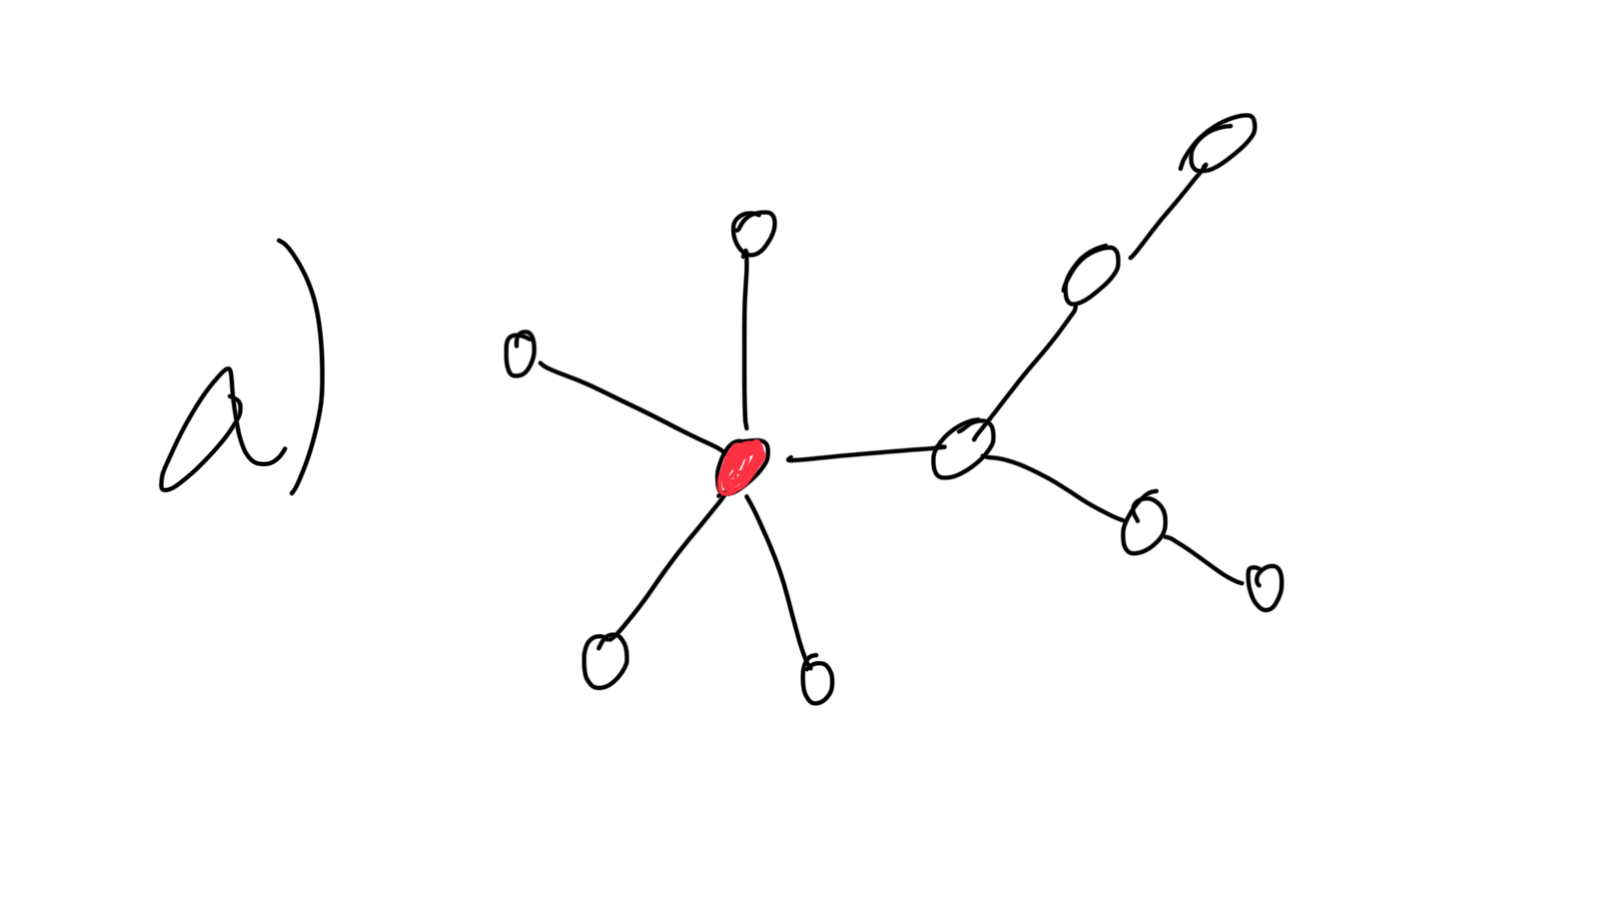

In [313]:
from IPython import display
display.Image("2a.jpeg")

The red node highlighted in the network above clearly has the highest degree centrality, and it is one of the nodes that has the lowest closeness centralitys as it is somewhat far away from all of the other nodes in the network.

# 2b)

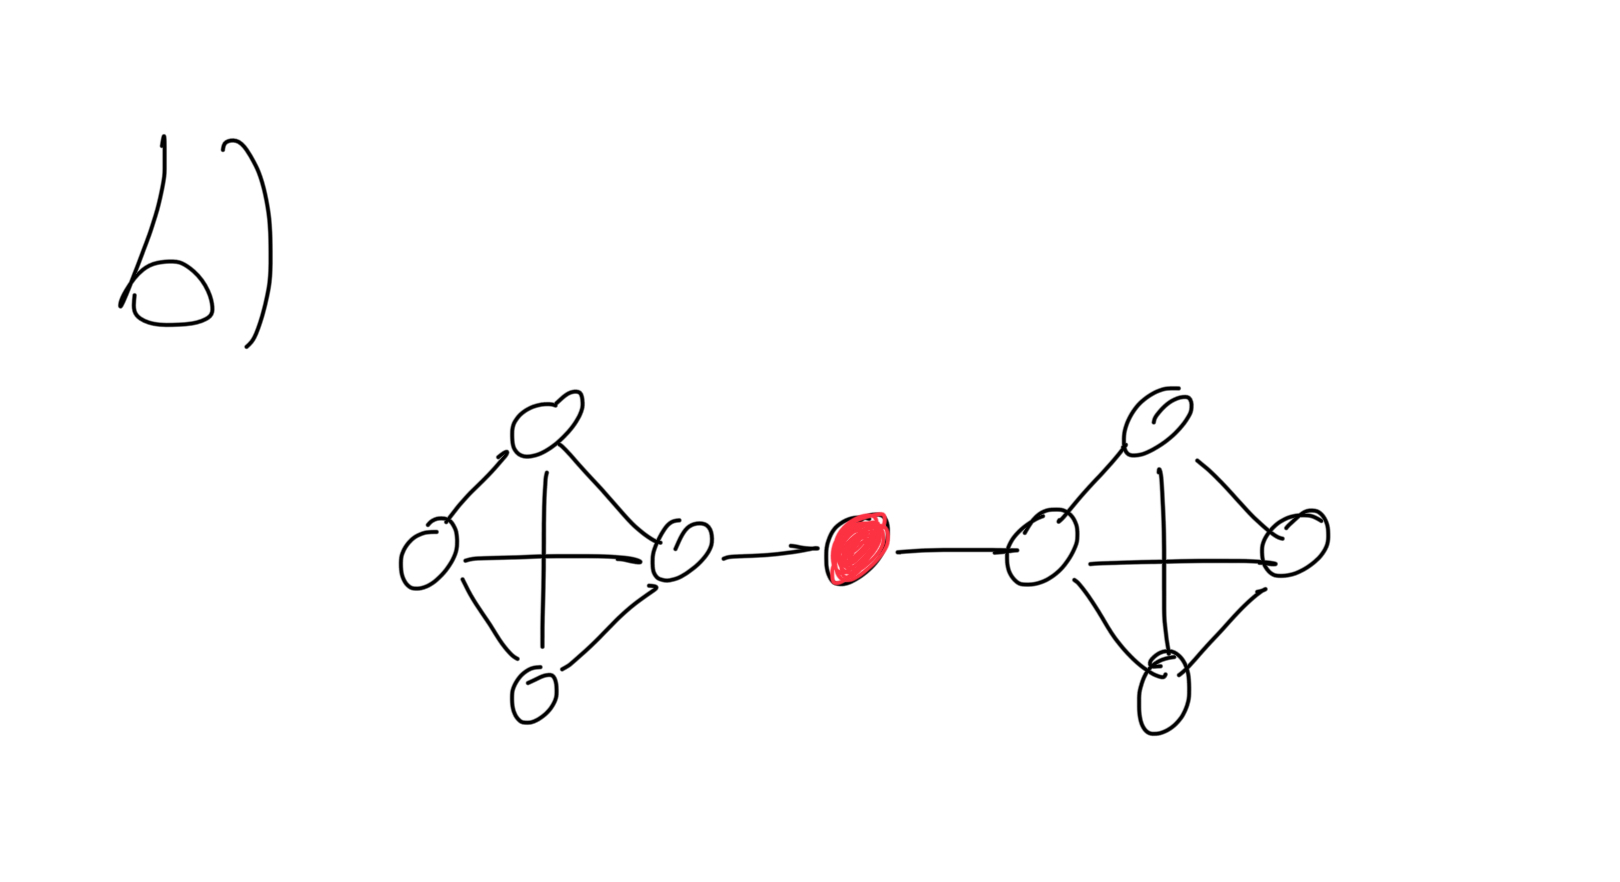

In [314]:
display.Image("2b.jpeg")

It is clear to see that the node highlighted in red has the smallest degree centrality, but it also is one of the nodes that has one of the highest closeness centrality's, since it is relatively close to many of the other nodes in the network.

# 2c)

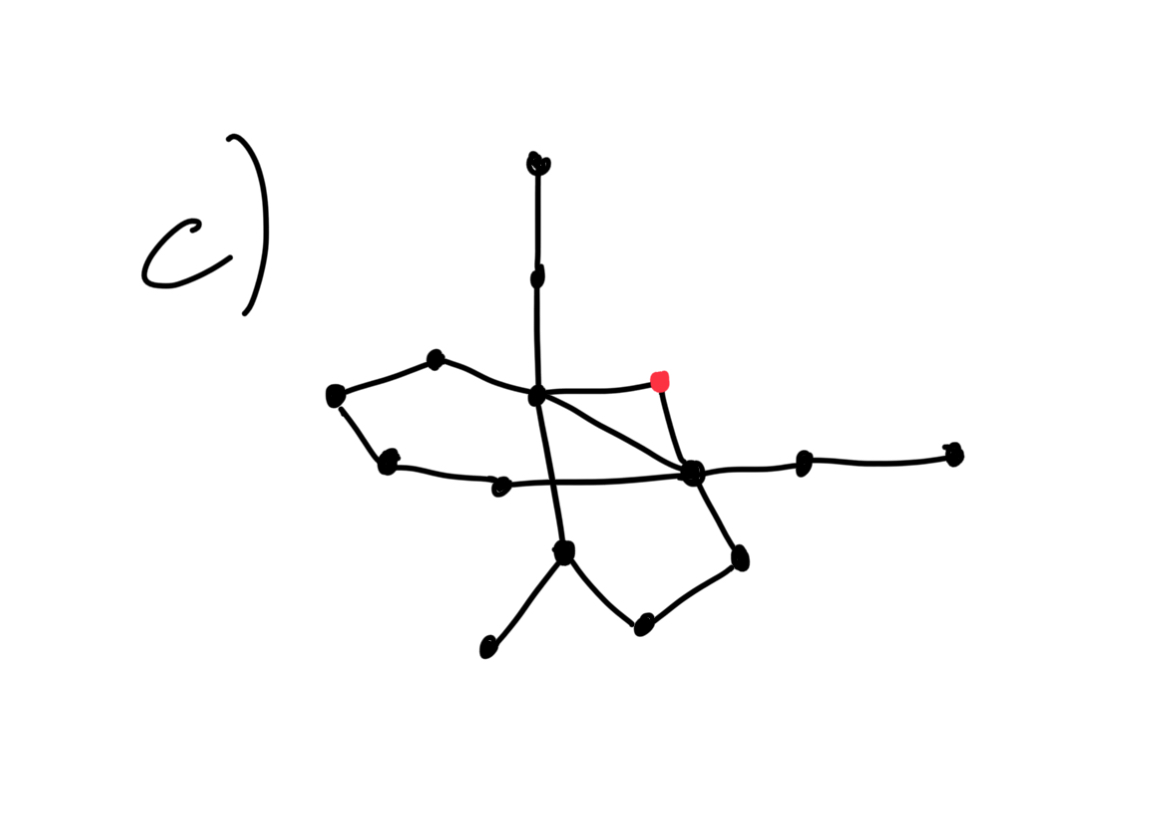

In [315]:
display.Image("2c.jpeg")

While this may seem like an arbitrarily drawn network, numerical computations showed that the node highlighted in red had one of the highest closeness centralities of all of the nodes in the network, but it also had a low betweenness centrality, since not a lot of "traffic" needs to pass through this node to get from one side of the network to the other.

# 2d)

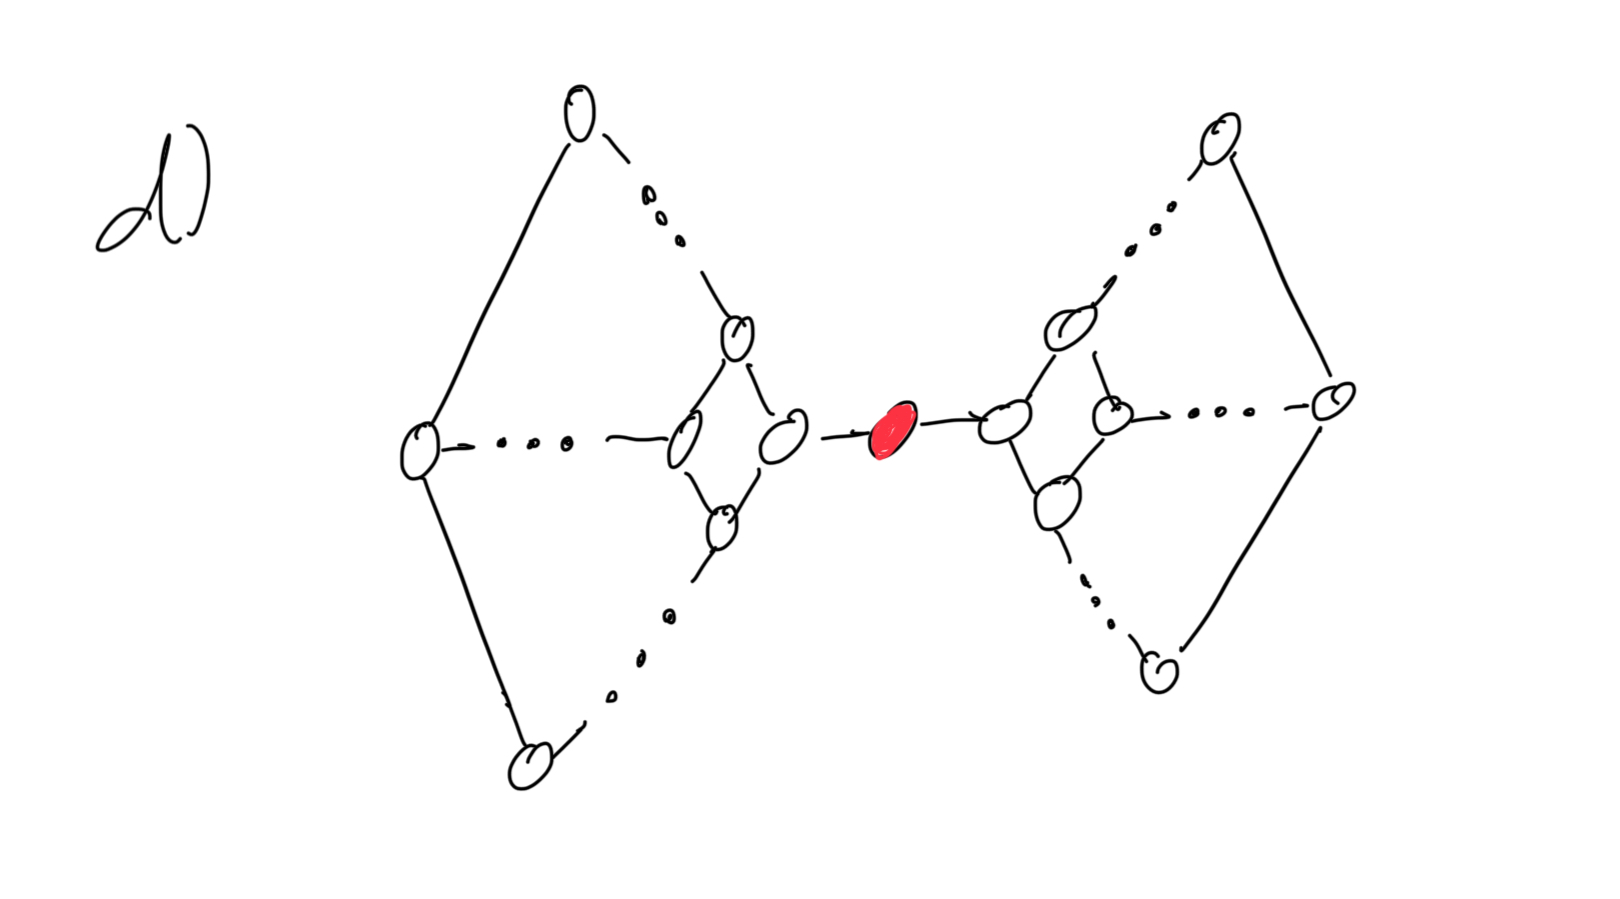

In [316]:
display.Image("2d.jpeg")

For the node drawn in red above, a lot of traffic needs to go through this node to get from one side of the network to the other, indicating its high degree of betweenness centrality. On the other hand, it is far away from many of the other nodes in the network, especially if the branches were to go arbitrarily far, shown as the 3 dots. As a result, it also has a low closeness centrality.